<a href="https://colab.research.google.com/github/Kajalsah1/2418104_kajalsah/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
bank_path = "/content/drive/MyDrive/Colab Notebooks/workshop2/bank.csv"
medical_path = "/content/drive/MyDrive/Colab Notebooks/workshop2/medical_students_dataset.csv"
titanic_path = "/content/drive/MyDrive/Colab Notebooks/workshop2/Titanic-Dataset.csv"


SECTION 3.1 – Warming Up Exercises (bank.csv)

1. Load the Dataset

In [ ]:
import pandas as pd

bank = pd.read_csv(bank_path)
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Inspect Data

In [ ]:
# Identify dtype = object columns
object_cols = bank.select_dtypes(include="object").columns
object_cols

#Unique values in object columns
{col: bank[col].unique() for col in object_cols}

#total null values in each column
bank.isnull().sum()

#drop all object columns
bank_numeric = bank.drop(columns=object_cols)
bank_numeric.head()
bank_numeric.to_csv("banknumericdata.csv", index=False)
bank_numeric2 = pd.read_csv("banknumericdata.csv")
bank_numeric2.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


SECTION 3.2 – Medical Student Dataset

Load dataset


In [ ]:
medical = pd.read_csv(medical_path)
medical.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
# Check missing values
medical.isnull().sum()


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [ ]:
# Missing values (multiple techniques)
medical_ffill = medical.ffill()

#Mean
medical_mean = medical.fillna(medical.mean(numeric_only=True))

#Median
medical_median = medical.fillna(medical.median(numeric_only=True))
print("""
Numeric columns → Mean/Median
Sequential columns (dates, ages, ordered) → Forward fill
Categorical columns → Fill with mode or constant
""")

#handle duplicate rows
duplicates_count = medical.duplicated().sum()
duplicates_count

medical_cleaned = medical.drop_duplicates()
medical_cleaned.head()




Numeric columns → Mean/Median
Sequential columns (dates, ages, ordered) → Forward fill
Categorical columns → Fill with mode or constant



,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


SECTION 3.3 – Titanic Dataset

In [ ]:
#Load Titanic Data
titanic = pd.read_csv(titanic_path)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Problem 1 — Subsetting + Summary Stats

In [ ]:
#subset required columns
cols = ['Name','Pclass','Sex','Age','Fare','Survived']
subset = titanic[cols]

first_class = subset[subset['Pclass'] == 1]
first_class.head()

first_class['Fare'].describe()


,Fare
count,216.000000
mean,84.154687
std,78.380373
min,0.000000
25%,30.923950
50%,60.287500
75%,93.500000
max,512.329200


Problem 2 — Null values in Age + drop

In [ ]:
first_class['Age'].isnull().sum()
first_class_clean = first_class.dropna(subset=['Age'])
first_class_clean.head()


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem 3 — One-hot Encoding 'Embarked'

In [ ]:
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix="Embarked")
titanic_encoded = pd.concat([titanic, embarked_dummies], axis=1)
titanic_encoded.drop(columns=['Embarked'], inplace=True)
titanic_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Visualization Section

In [ ]:
# import seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


Problem 4 — Survival Rate by Sex

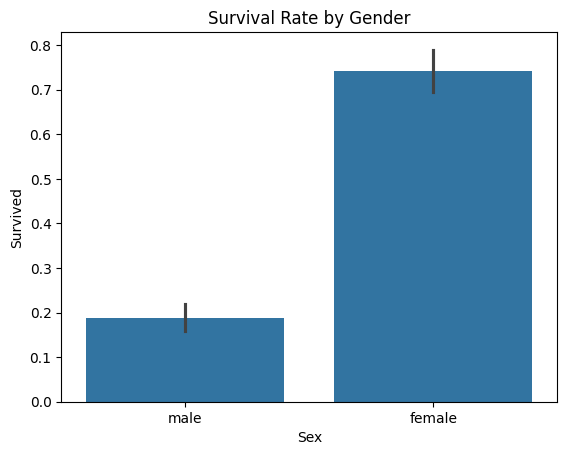

In [ ]:
sns.barplot(data=titanic, x="Sex", y="Survived")
plt.title("Survival Rate by Gender")
plt.show()


Problem 5 — Survival Rate by Embarked

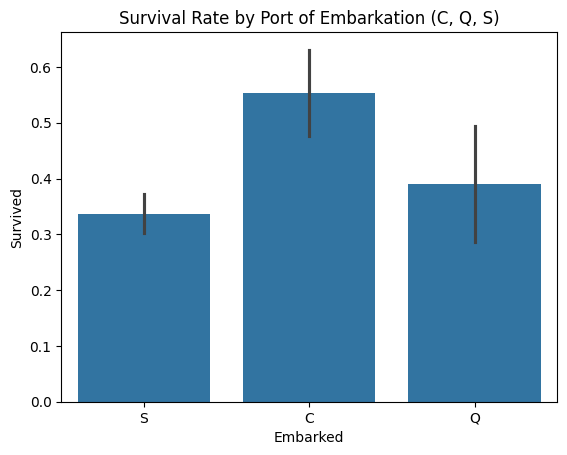

In [ ]:
sns.barplot(data=titanic, x="Embarked", y="Survived")
plt.title("Survival Rate by Port of Embarkation (C, Q, S)")
plt.show()


Problem 6 — Age Groups + Class Survival

/tmp/ipython-input-3832607459.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_matrix = titanic.groupby(['AgeGroup','Pclass'])['Survived'].mean()


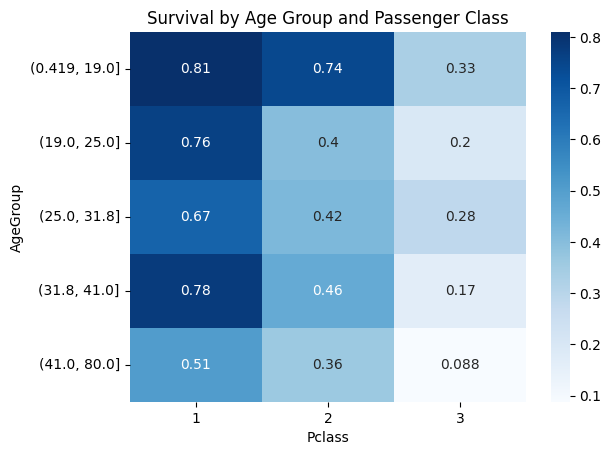

In [ ]:
titanic['AgeGroup'] = pd.qcut(titanic['Age'], 5)
survival_matrix = titanic.groupby(['AgeGroup','Pclass'])['Survived'].mean()
survival_matrix
sns.heatmap(survival_matrix.unstack(), annot=True, cmap="Blues")
plt.title("Survival by Age Group and Passenger Class")
plt.show()

